# **Task III b : Implementing a quantum neural network**
### Problem Statement:
Implement a quantum neural network of any architecture (except convolutional) in Tensorflow Quantum.Specifically, show that the models fits the dataset and that your training loss decreases over time. 

### Dataset:
The electron-photon dataset (which can be found here) contains 100 samples for training and another 100 for testing, laid out as follows:

● data["x_train"]: Training dataset of 100 32x32 images containing the particles' energy (100, 32, 32)

● data["y_train"]:" Training labels, 0 = "photon", 1 = "electron" (100,)

● data["x_test"]: Test dataset of 100 32x32 images containing the particles' energy (100, 32, 32)

● data["y_test"]:" Test labels, 0 = "photon", 1 = "electron" (100,)

<br>
The approach used to solve this task is a recently suggested approach[1] and has an inherent analogy to classical neural networks. The architecture used is a Parameterised Quantum Circuit called a Data Reuploading Classifier(DRC) which can perform classification tasks using just 1 qubit. However, to increase performance or to use it for multi-class classification, we may more than one qubit. But still, performing classifiction-type tasks using so much less resources is a great thing to have in this NISQ era.


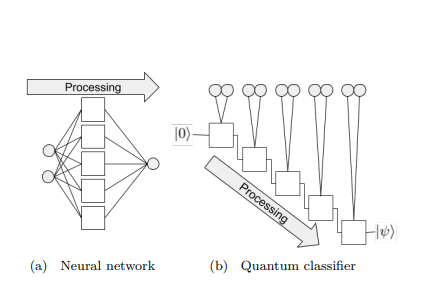



In [1]:
# !pip install tensorflow==2.7.0
!pip install tensorflow==2.4.1
!pip install tensorflow-quantum==0.5.1
# Cirq linking seems to be broken, so reinstall the core package
!pip install --no-deps --force-reinstall cirq-core==0.11.0

     |████████████████████████████████| 394.3 MB 11 kB/s 
     |████████████████████████████████| 132 kB 58.5 MB/s 
     |████████████████████████████████| 462 kB 52.7 MB/s 
     |████████████████████████████████| 3.8 MB 43.0 MB/s 
     |████████████████████████████████| 2.9 MB 44.9 MB/s 
     |████████████████████████████████| 14.8 MB 33.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=c4c21bfba4381d9fa89442612f159e041e886e94129873133462f9cfaff25206
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting

     |████████████████████████████████| 7.8 MB 4.3 MB/s 
     |████████████████████████████████| 90 kB 8.1 MB/s 
     |████████████████████████████████| 5.6 MB 47.8 MB/s 
     |████████████████████████████████| 1.3 MB 23.5 MB/s 
     |████████████████████████████████| 90 kB 7.1 MB/s 
     |████████████████████████████████| 100 kB 8.5 MB/s 
     |████████████████████████████████| 1.5 MB 42.0 MB/s 
     |████████████████████████████████| 380 kB 70.4 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 92 kB 993 kB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████

  Using cached cirq_core-0.11.0-py3-none-any.whl (1.5 MB)
  Attempting uninstall: cirq-core
    Found existing installation: cirq-core 0.11.0
    Uninstalling cirq-core-0.11.0:
      Successfully uninstalled cirq-core-0.11.0


In [ ]:
# !pip install tensorflow-quantum nightly

In [ ]:
# pip install quple==0.9.0

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit


In [2]:
pip install quple==0.9.0

     |████████████████████████████████| 97 kB 3.0 MB/s 


In [3]:
from google.colab import files
uploaded = files.upload()

Saving electron-photon.npz to electron-photon.npz


In [4]:
data = np.load('./electron-photon.npz',allow_pickle=True)

In [5]:
for key in data.keys():
    print(key)
    print(data[key])
print(data[key].shape)

x_train
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
y_

We will convert the labels to on hot encoding format (1/0 to 1/-1)to calculate loss function

In [6]:
X_train=data['x_train']
X_test=data['x_test']
y_train = data['y_train']
y_test = data['y_test']

y_train = 2*y_train-1
y_test = 2*y_test-1

#First Approach - Flatten the images and pass to the PQC directly

X_train_temp = np.reshape(X_train,(100,32*32)) 
X_test_temp = np.reshape(X_test,(100,32*32))
#check
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 32, 32)
(100, 32, 32)
(100,)
(100,)


The data contains images with dimensions, so we need to convert them into images with lower dimensions

<Figure size 432x288 with 0 Axes>

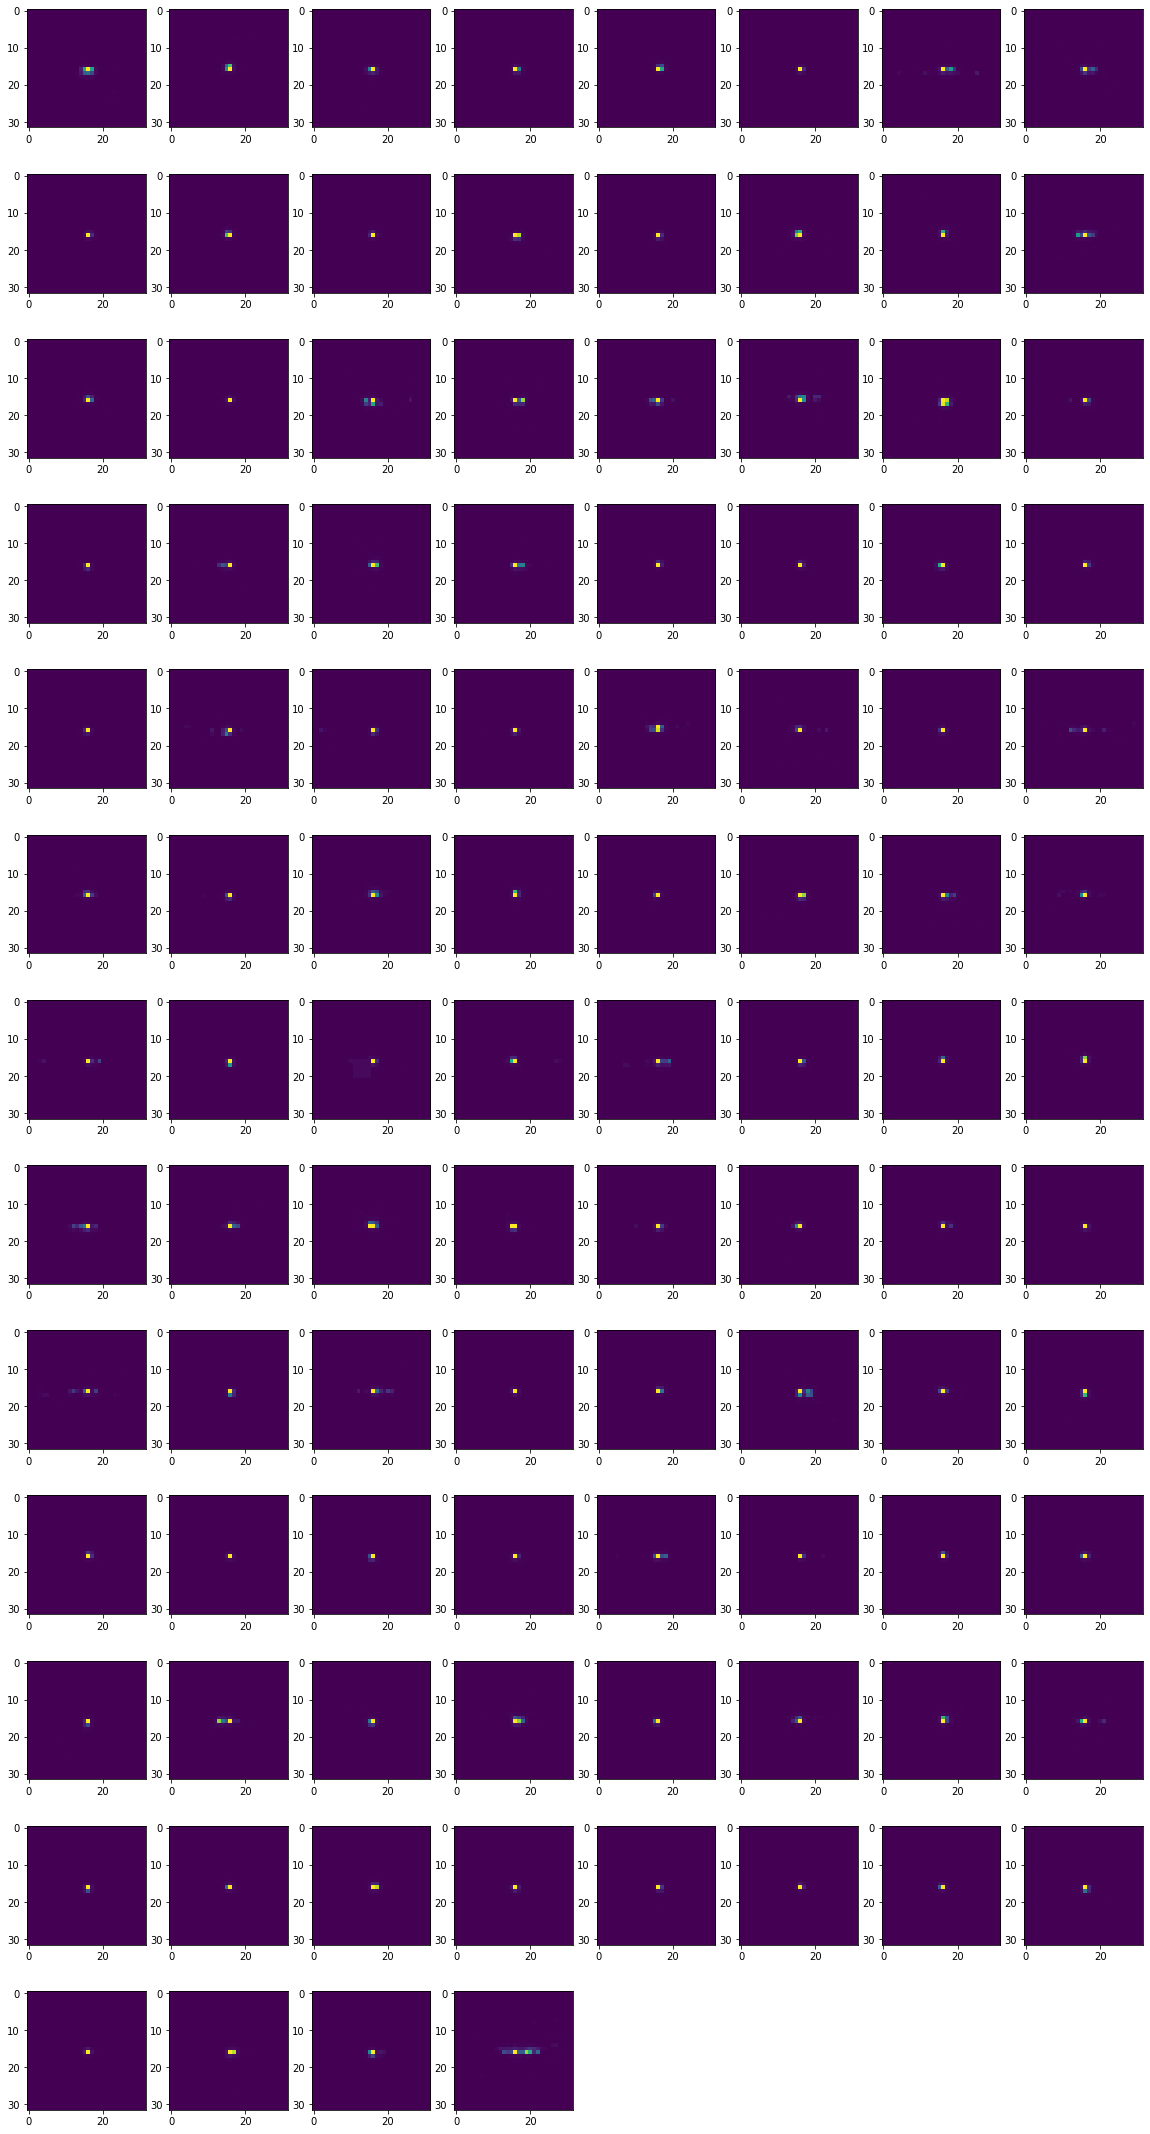

In [7]:
from quple.utils.visualization import visualize_images


a = visualize_images(X_train[0::])

We can observe that the images are concentrated towards the center and the other areas are sparse, so there's room for dimensionality reduction 

<Figure size 432x288 with 0 Axes>

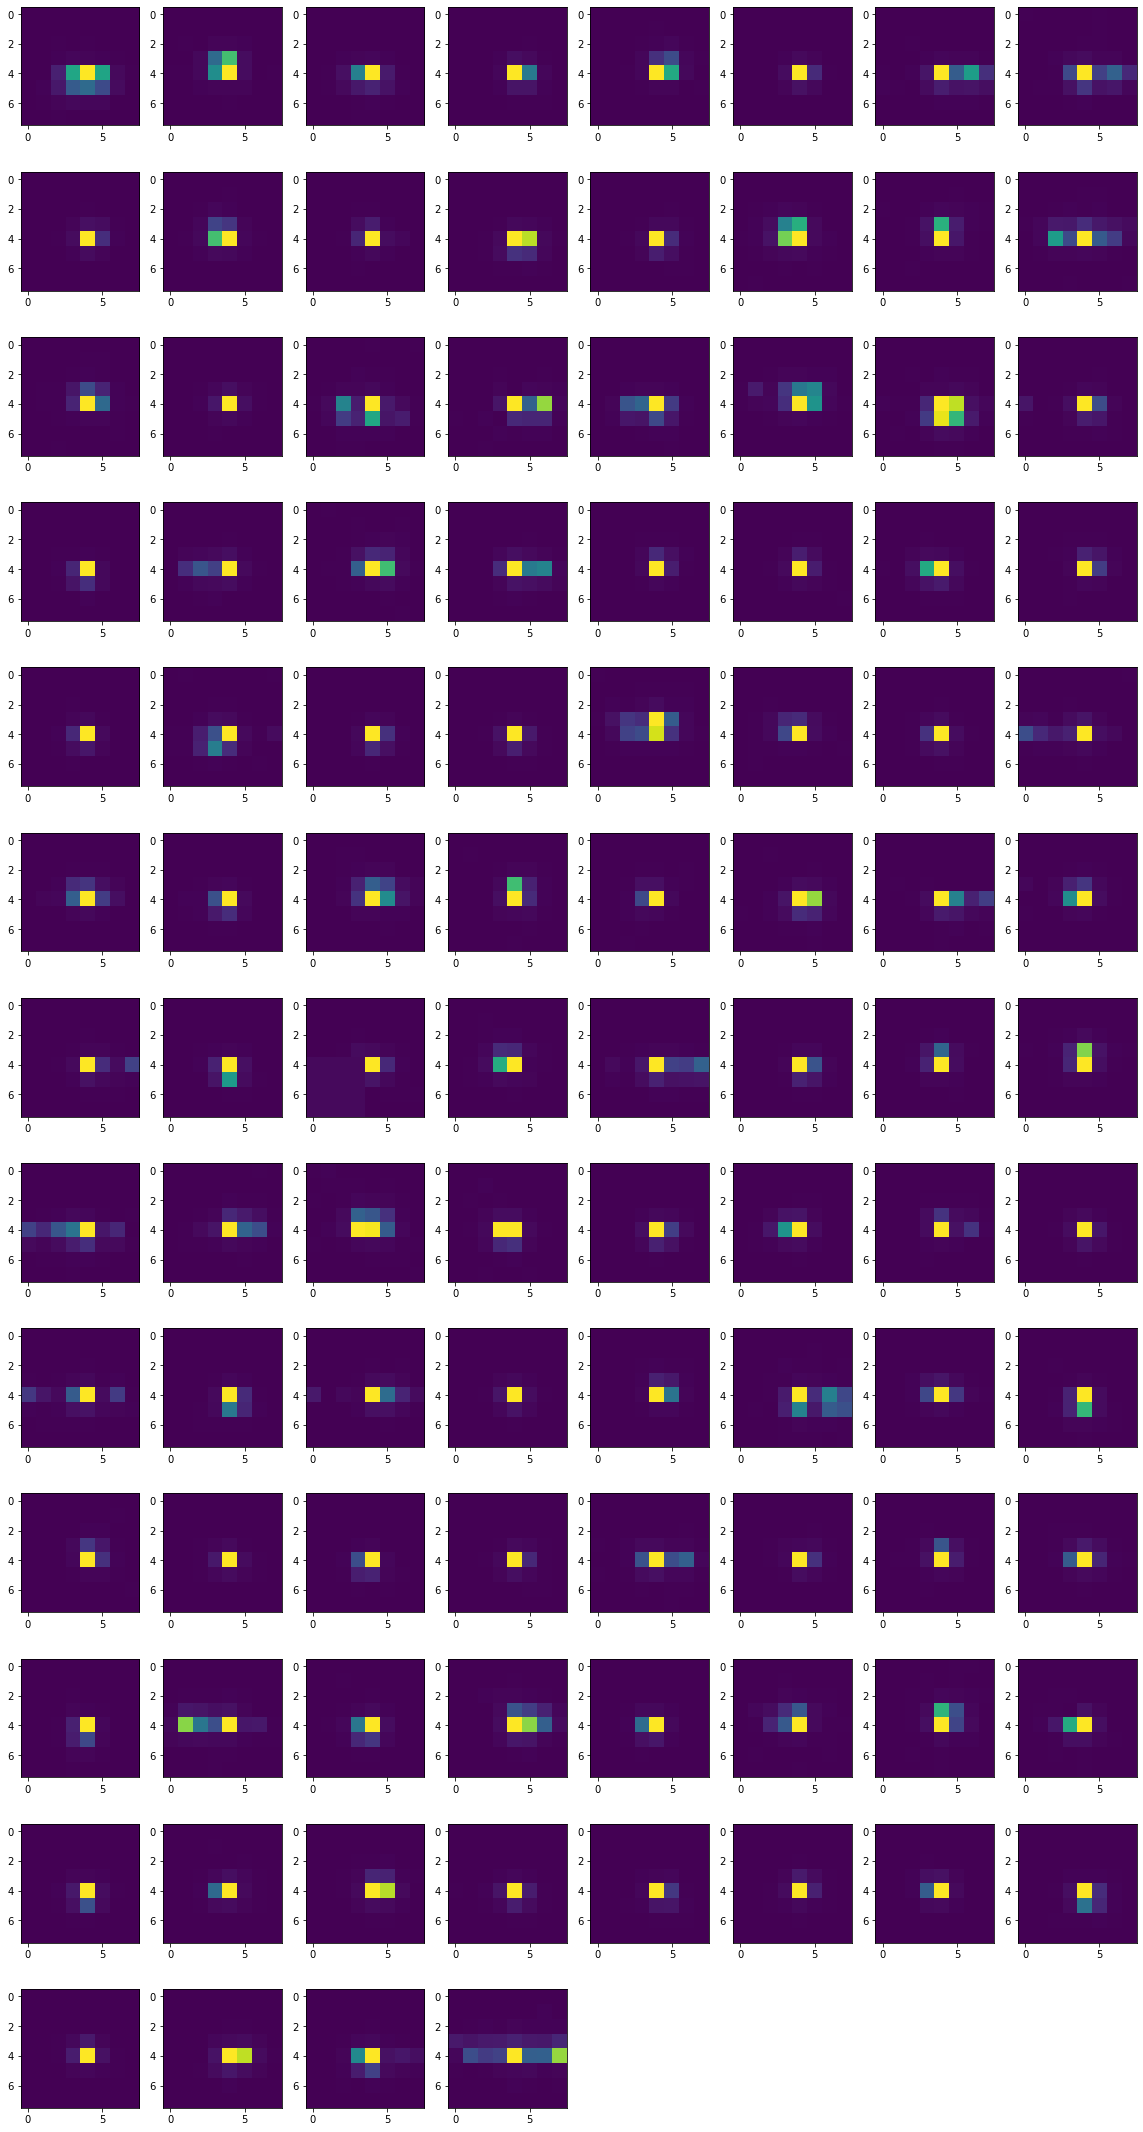

In [8]:
# Second Approach - Cropping the images and then passing to the PQC 
from quple.utils.data_preparation import crop_images
crop_size = (8, 8)
x_train_cropped = crop_images(X_train, dimension=crop_size)
x_test_cropped = crop_images(X_test, dimension=crop_size)
a = visualize_images(x_train_cropped)

In quantum circuits, Classical data is encoded as the rotation angle of a gate operation in a quantum circuit which has a valid range of  [−π,+π] . However, from past experience a smaller range will suffice and even show better performance than the valid range itself. So for this task, we will be rescaling our data to a unit range (i.e.  [−1,+1] ) following the range used by https://arxiv.org/abs/1906.10467.

In [9]:
from quple.utils.data_preparation import rescale_data
x_train_rescaled, x_test_rescaled = rescale_data(x_train_cropped, x_test_cropped, val_range=(-1, 1))

X_train_final = np.reshape(x_train_rescaled, (x_train_rescaled.shape[0], 8*8))
X_test_final = np.reshape(x_test_rescaled, (x_test_rescaled.shape[0], 8*8))

In [10]:
X_train_final.shape


(100, 64)

In [11]:
!git clone https://github.com/eraraya-ricardo/qcnn-hep.git

Cloning into 'qcnn-hep'...
remote: Enumerating objects: 744, done.
remote: Counting objects: 100% (380/380), done.
remote: Compressing objects: 100% (376/376), done.
remote: Total 744 (delta 225), reused 3 (delta 2), pack-reused 364
Receiving objects: 100% (744/744), 4.95 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (377/377), done.


In [12]:
%cd './qcnn-hep'
!python setup.py

/content/qcnn-hep
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


In [13]:
from qcnn_drc.data_reuploading import ReUploadingPQC

In [88]:
# Third approach- Applying PCA to cropped images and passing to PQC

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_pca = 20
# scaler = StandardScaler()
# scaler.fit(X_train.reshape(-1, 32*32))
# X_train_scaled = scaler.transform(X_train.reshape(-1, 32*32))
# X_test_scaled = scaler.transform(X_test.reshape(-1, 32*32))

# pca = PCA(n_components=n_pca)
# pca.fit(X_train_scaled)

# X_train_transform = pca.transform(X_train_scaled)
# X_test_transform = pca.transform(X_test_scaled)

X_train_flatten = X_train.reshape(-1,32*32)
X_test_flatten = X_test.reshape(-1,32*32)

pca = PCA(n_components=n_pca)
pca.fit(X_train_flatten)

X_train_transform = pca.transform(X_train_flatten)
X_test_transform = pca.transform(X_test_flatten)

print(X_train_transform.shape, y_train.shape)
print(X_test_transform.shape, y_test.shape)

# print(X_train_transform) 
# Let's check if the pca transform preserves the inherent variance present in this data
print(np.cumsum(pca.explained_variance_ratio_))      

(100, 20) (100,)
(100, 20) (100,)
[0.4811806  0.65938264 0.76321    0.84084564 0.8902272  0.92087126
 0.94699305 0.96008587 0.9696481  0.97645706 0.9819478  0.9866961
 0.9900474  0.9928829  0.9952729  0.99634343 0.9969102  0.99742794
 0.9977712  0.99806195]


In [57]:
# Custom accuracy metric
@tf.function
def custom_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true)
    y_pred = tf.map_fn(lambda x: 1.0 if x >= 0 else -1.0, y_pred)
    return tf.keras.backend.mean(tf.keras.backend.equal(y_true, y_pred))

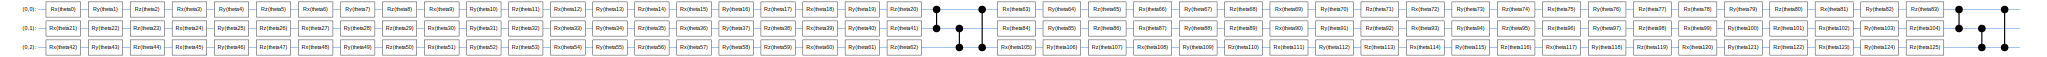

In [83]:
n_qubits = 3
layers = 2

qubits = cirq.GridQubit.rect(1,n_qubits) #default = single qubit
Z = cirq.PauliString(cirq.Z(qubits[-1]))
I = cirq.PauliString(cirq.I(qubits[-1]))
observables = [0.5*(I - Z)]

input_tensor = tf.keras.Input(shape = (X_train_transform.shape[1],), dtype = tf.dtypes.float32,name='input_data')
output_data = ReUploadingPQC(n_qubits,layers,X_train_transform.shape[1],
                             use_entanglement=True, 
                             use_terminal_entanglement=True,
                             observables = observables)(input_tensor)
model = tf.keras.Model(inputs=[input_tensor],outputs=[output_data])

optimizer = tf.keras.optimizers.Adam(lr=0.1)
model.compile(loss = 'mse',optimizer=optimizer,metrics=[custom_accuracy,tf.keras.metrics.AUC(name='auc')])

SVGCircuit(ReUploadingPQC(n_qubits,layers,X_train_transform.shape[1],
                          use_entanglement=True, 
                          use_terminal_entanglement=True,
                          observables = observables).circuit)

In [84]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_data (InputLayer)      [(None, 20)]              0         
_________________________________________________________________
re-uploading_PQC (ReUploadin (None, 1)                 252       
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


In [85]:
last_epoch = 0
# Train the model
H = model.fit(X_train_transform, y_train, initial_epoch=last_epoch,
              batch_size=32,
              epochs=400,
              validation_data=(X_test_transform, y_test),
              shuffle=True)

Epoch 1/400
4/4 [==============================] - 4s 673ms/step - loss: 1.0166 - custom_accuracy: 0.5406 - auc: 0.0000e+00 - val_loss: 1.0520 - val_custom_accuracy: 0.5781 - val_auc: 0.0000e+00
Epoch 2/400
4/4 [==============================] - 1s 385ms/step - loss: 1.0070 - custom_accuracy: 0.5792 - auc: 0.0000e+00 - val_loss: 1.1607 - val_custom_accuracy: 0.5781 - val_auc: 0.0000e+00
Epoch 3/400
4/4 [==============================] - 2s 463ms/step - loss: 1.0192 - custom_accuracy: 0.5500 - auc: 0.0000e+00 - val_loss: 1.0287 - val_custom_accuracy: 0.5781 - val_auc: 0.0000e+00
Epoch 4/400
4/4 [==============================] - 2s 487ms/step - loss: 0.9756 - custom_accuracy: 0.5667 - auc: 0.0000e+00 - val_loss: 1.1118 - val_custom_accuracy: 0.5781 - val_auc: 0.0000e+00
Epoch 5/400
4/4 [==============================] - 2s 444ms/step - loss: 0.9770 - custom_accuracy: 0.5823 - auc: 0.0000e+00 - val_loss: 1.1405 - val_custom_accuracy: 0.5781 - val_auc: 0.0000e+00
Epoch 6/400
4/4 [========

Text(0, 0.5, 'Loss')

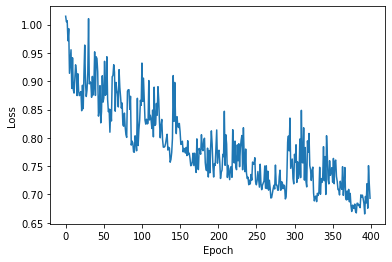

In [86]:
plt.plot(H.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

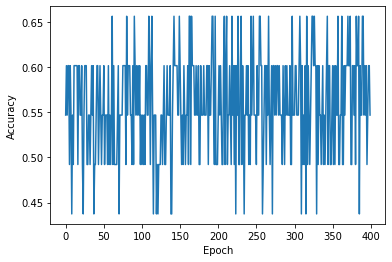

In [87]:
plt.plot(H.history['custom_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

<!-- 
I tried three approaches- <br>
i. One is to directly flatten the image and pass it to the DRC but this does not work because the data is sparse, the circuit becomes very large but has no effect because most of the gates do not perform any transformation.<br>
ii. Second approach is to crop the image to get rid of sparsity and then pass it to the DRC but even with this approach, the model does not learn<br>
iii. Third approach is to crop the image, then apply PCA to get down 6-8 features per sample and then pass it to the DRC, but still the model fails to learn.Though this approach doesn't make much sense but I tried it just in case, because the above two failed.<br>
From the above results, it is evident that the model fails to learn which maybe because of the following reasons:
1. The dataset contains images with very sparse data(almost all values except at the centre of image are zero)
2. The dataset has less samples.
3. There is some fundamental issue with my implementation of the model, but I am unable to figure it out.<br>
I humbly request to the mentors, if they review this approach, then please provide me with feedback about what actually went wrong. -->



# **Conclusion**

1. It is evident that the loss incurred by the model does reduce after fine-tuning it with by changing hyperparameters
2. The performance of the model in terms of accuracy is not satisfactory which maybe due to less number of training examples in the dataset.
3. One thing to note is that this is a fairly new approach and needs to studied more to check if it really does provide any actual advantage over other approaches or is atleast at par with them.


# **References**
[1]- [Data re-uploading for a universal quantum classifier-Adrián Pérez-Salinas, Alba Cervera-Lierta, Elies Gil-Fuster, and José I. Latorre,](https://arxiv.org/pdf/1907.02085.pdf)